In [1]:
pip install pandas numpy openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

In [9]:
df = pd.read_csv("C:\\Users\\anvim\\Desktop\\PYTHON ASS\\machine learning\\Employee.CSV")
print(df)

     Company   Age  Salary     Place Country  Gender
0        TCS  20.0     NaN   Chennai   India       0
1    Infosys  30.0     NaN    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]


In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values[:10]}")  # Display only the first 10 unique values for clarity
    print(f"Number of Unique Values: {num_unique_values}")
    print("-" * 50)  # Separator for better readability

Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 7
--------------------------------------------------
Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22.]
Number of Unique Values: 30
--------------------------------------------------
Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089.]
Number of Unique Values: 41
--------------------------------------------------
Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal']
Number of Unique Values: 12
--------------------------------------------------
Column: Country
Unique Values: ['India']
Number of Unique Values: 1
--------------------------------------------------
Column: Gender
Unique Values: [0 1]
Number of Unique Values: 2
--------------------------------------------------


In [12]:
numeric_df = df.select_dtypes(include='number')

statistics = numeric_df.describe().T  # Transpose for better readability
statistics['median'] = numeric_df.median()
statistics['std_dev'] = numeric_df.std()
statistics['skew'] = numeric_df.skew()
statistics['kurtosis'] = numeric_df.kurtosis()

# Display statistical analysis summary
print("Statistical Analysis Summary:")
print(statistics)

# Step 2: Rename Columns
# Define a dictionary mapping for old column names to new names
column_rename_mapping = {
    'Company': 'Company_Name',
    'Age': 'Age of Employee',
    'Salary': 'Salary in Rupees',
   
    # Add more columns if needed
}

# Rename the columns using the dictionary
df.rename(columns=column_rename_mapping, inplace=True)

# Display updated DataFrame column names
print("\nUpdated DataFrame Columns:")
print(df.columns)

Statistical Analysis Summary:
        count         mean          std     min     25%     50%      75%  \
Age     130.0    30.484615    11.096640     0.0    22.0    32.5    37.75   
Salary  124.0  5312.467742  2573.764683  1089.0  3030.0  5000.0  8000.00   
Gender  148.0     0.222973     0.417654     0.0     0.0     0.0     0.00   

           max  median      std_dev      skew  kurtosis  
Age       54.0    32.5    11.096640 -0.583808  0.717797  
Salary  9876.0  5000.0  2573.764683  0.169639 -1.255575  
Gender     1.0     0.0     0.417654  1.344760 -0.194433  

Updated DataFrame Columns:
Index(['Company_Name', 'Age of Employee', 'Salary in Rupees', 'Place',
       'Country', 'Gender'],
      dtype='object')


In [16]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Step 1: Find missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Step 2: Replace inappropriate values
# Replace 0 in the 'age' column with NaN to mark them as missing
df['Age of Employee'] = df['Age of Employee'].replace(0, np.nan)

# Step 3: Remove duplicate rows
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# Step 4: Outlier Detection
# Here, we'll use the IQR method for numerical columns

numeric_cols = df.select_dtypes(include='number')
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
print("\nOutliers detected:")
for col, outlier_vals in outliers.items():
    print(f"{col}: {len(outlier_vals)} outliers")

# Step 5: Treating Null Values
# Replace missing values with mean/median/mode as appropriate for each column

# Numerical columns can be filled with mean or median
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill with mode
categorical_cols = df.select_dtypes(include='object')
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nNull values after treatment:")
print(df.isnull().sum())

Missing values in each column:
Company_Name        0
Age of Employee     0
Salary in Rupees    0
Place               0
Country             0
Gender              0
dtype: int64

Shape after removing duplicates: (144, 6)

Outliers detected:
Age of Employee: 0 outliers
Salary in Rupees: 0 outliers
Gender: 32 outliers


C:\Users\anvim\AppData\Local\Temp\ipykernel_11732\257107748.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age of Employee'] = df['Age of Employee'].replace(0, np.nan)



Null values after treatment:
Company_Name        0
Age of Employee     0
Salary in Rupees    0
Place               0
Country             0
Gender              0
dtype: int64


In [17]:
# Filter data
filtered_df = df[(df['Age of Employee'] > 40) & (df['Salary in Rupees'] < 5000)]
print("Filtered Data:")
print(filtered_df)

Filtered Data:
    Company_Name  Age of Employee  Salary in Rupees      Place Country  Gender
21       Infosys             50.0            3184.0      Delhi   India       0
32       Infosys             45.0            4034.0   Calcutta   India       0
39       Infosys             41.0            3000.0     Mumbai   India       0
50       Infosys             41.0            3000.0    Chennai   India       0
57       Infosys             51.0            3184.0  Hyderabad   India       0
68       Infosys             43.0            4034.0     Mumbai   India       0
75       Infosys             44.0            3000.0     Cochin   India       0
86       Infosys             41.0            3000.0      Delhi   India       0
93       Infosys             54.0            3184.0     Mumbai   India       0
104      Infosys             44.0            4034.0      Delhi   India       0
122      Infosys             44.0            3234.0     Mumbai   India       0
129      Infosys             50.0    

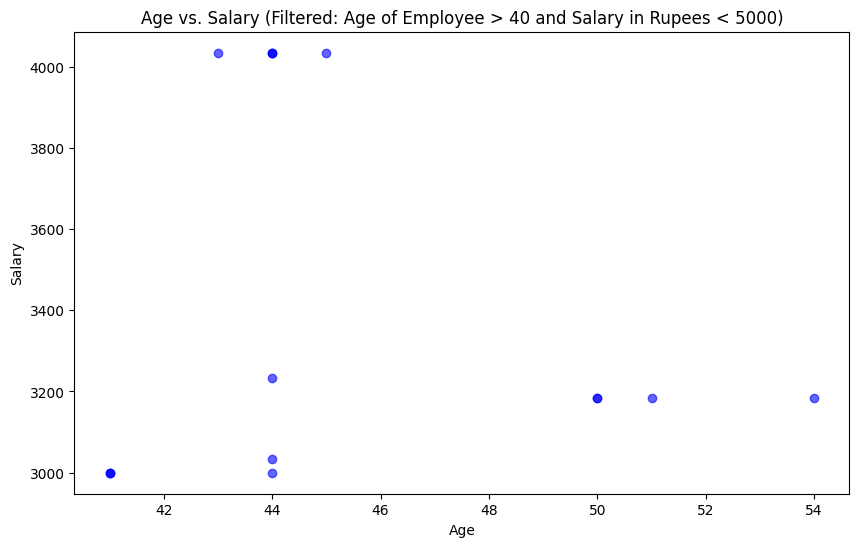

In [18]:
import matplotlib.pyplot as plt

# Plot age vs salary
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Age of Employee'], filtered_df['Salary in Rupees'], color='blue', alpha=0.6)
plt.title('Age vs. Salary (Filtered: Age of Employee > 40 and Salary in Rupees < 5000)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

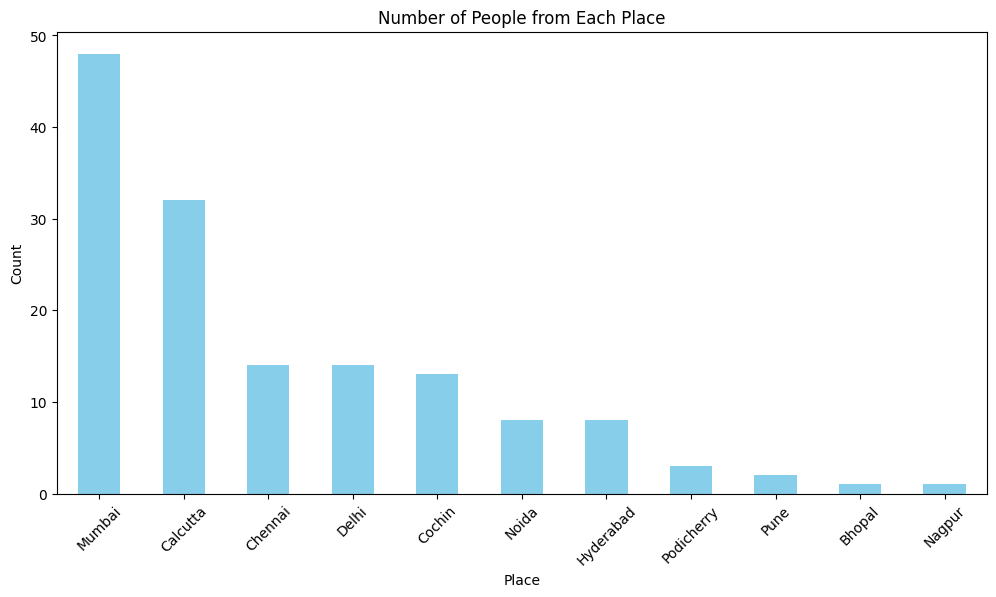

In [19]:
# Count people from each place
location_counts = df['Place'].value_counts()

# Plot the bar chart for locations
plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()